# Table of Content

- <a href='#n1'>Taking input</a>
- <a href='#n2'>Reading and Writing files synchronously</a>
- <a href='#n3'>Reading and Writing files asynchronously</a>
- <a href='#n4'>Creating a simple web server</a>
- <a href='#n5'>What is Routing?</a>
- <a href='#n6'>Creating routes</a>
- <a href='#n7'>Sending HTML response</a>
- <a href='#n8'>Setting headers for response</a>
- <a href='#n9'>Working with JSON data</a>
- <a href='#n10'>Transforming JSON data into HTML</a>
- <a href='#n11'>Parsing Query string from URL</a>
- <a href='#n12'>Creating a reusable function</a>
- <a href='#n13'>Creating a custom module</a>
- <a href='#n14'>Event driven architecture</a>
- <a href='#n15'>Emitting and Handling custom events</a>
- <a href='#n16'></a>
- <a href='#n17'></a>
- <a href='#n18'></a>
- <a href='#n19'></a>
- <a href='#n20'></a>
- <a href='#n21'></a>
- <a href='#n22'></a>
- <a href='#n23'></a>
- <a href='#n24'></a>
- <a href='#n25'></a>
- <a href='#n26'></a>
- <a href='#n27'></a>
- <a href='#n28'></a>
- <a href='#n29'></a>
- <a href='#n30'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>
- <a href='#n'></a>

NodeJs is JavaScript runtime, built on Google's open source V8 engine.

<pre id='n1'></pre>
# Taking input

In [ ]:
# app.js

const readline = require('readline');

const rl = readline.createInterface({
    input:process.stdin,
    output:process.stdout
});

rl.question("Please enter your name: ", (name)=>{
    console.log("You entered: "+ name); # we can use comma also instead of +
    rl.close();
})

rl.on('close', ()=>{
    console.log("Interface closed");
    process.exit(0)
})

# Working with files

In [ ]:
console.log(__filename); # return path of current file
console.log(__dirname); # return path of current directory

In [ ]:
const path = require('path');

const dirPath = path.join(__dirname, 'files'); # files is folder name which is already created

In [ ]:
const path = require('path');

console.log(path.parse('./app.js'))

# Output:
{ root: '', dir: '.', base: 'app.js', ext: '.js', name: 'app' }

In [ ]:
# Creating and writing to file

const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'files'); 

for(i=0;i<5;i++) 
{
    fs.writeFileSync(dirPath+"/hello"+i+".txt", "this is data") # create and write to the file
}

In [ ]:
# reading directory

const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'files');

fs.readdir(dirPath, (err, files) => {
    
    console.log(files); # array of files

    files.forEach(file => {
        console.log(file);
    });
})

### CRUD with file system

In [ ]:
# CREATE
const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'crud'); # assuming crud folder already exist
const filePath = `${dirPath}/apple.txt`;

fs.writeFileSync(filePath, "This is my file content");

# if 'apple.txt' file exist then it will overwrite the data
# if 'apple.txt' doest not exist then it will create the file and write data to it

In [ ]:
# READ
const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'crud');
const filePath = `${dirPath}/apple.txt`;

fs.readFile(filePath, 'utf-8', (err, data) => {
    console.log(data);
});

# if file does not exist then console.log will print undefined (no error thrown if file not exist)

In [ ]:
# UPDATE
const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'crud');
const filePath = `${dirPath}/apple.txt`;

fs.appendFile(filePath, "\nThis is updated line", (err) => {
    if(err){
        console.log("Some thing went wrong");
    }
    
}); 

# if file exist then it will append data to the file
# if file not exist it will create and add data to it

In [ ]:
# RENAME
const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'crud');
const filePath = `${dirPath}/apple.txt`;

fs.rename(filePath, `${dirPath}/fruit.txt`, (err) => {
    if(err) 
    console.log("Some thing went wrong");
}); 

In [ ]:
# DELETE
const fs = require('fs');
const path = require('path');

const dirPath = path.join(__dirname, 'crud');
const filePath = `${dirPath}/apple.txt`;

fs.unlinkSync(`${dirPath}/fruit.txt`) 

<pre id='n2'></pre>
# Reading and Writing files synchronously

In [ ]:
# app.js

const fs = require('fs');

let text = fs.readFileSync('./Files/input.txt', 'utf-8')
console.log(text)

let content = `Data read from input.txt: ${text}. \nDate created ${new Date()}`
    
fs.writeFileSync('./Files/output.txt', content); # if file not exist, nodejs will create file and then write data to it

Synchronous code simply means that each statement in program will be executed line by line in the order in which they have been written. And if any task gone take long time in its execution then next line of code will have to wait for its execution.

- **NodeJs is single threaded**.

Let's say if `input.txt` is very big that it(`fs.readFileSync('./Files/input.txt', 'utf-8')`) takes 10 minutes to read then next statement(`console.log(text)`) will have to wait for 10 minutes and after then it will be executed and output is diaplayed on console. This affects performance of application. 

<pre id='n3'></pre>
# Reading and Writing files asynchronously

In [ ]:
# app.js

const fs = require('fs');

fs.readFile('./Files/input.txt', 'utf-8', (error, data)=>{
    console.log(data);
})
console.log("Reading file")

In [ ]:
# app.js

const fs = require('fs');

fs.readFile('./Files/start.txt', 'utf-8', (error1, data1)=>{
    console.log(data1);
    
    fs.readFile(`./Files/${data1}`, 'utf-8', (error2, data2)=>{  # job of this readFile depend on result of previous readFile
        console.log(data2)
    })
})
console.log("Reading file")

# if we have not nested it instead we have separate all these then all will be executed asychronously

In [ ]:
# app.js

const fs = require('fs');

fs.readFile('./Files/start.txt', 'utf-8', (error1, data1)=>{
    console.log(data1);

    fs.readFile(`./Files/${data1}`, 'utf-8', (error2, data2)=>{ # must wait for result of previous readFile beacause it is nested inside it
        console.log(data2);

        fs.readFile('./Files/append.txt', 'utf-8', (error3, data3)=>{ # must wait for result of previous readFile beacause it is nested inside it
            console.log(data3);

            fs.writeFile('./Files/output.txt', `${data2}\n\n${data3}\n\nDate created ${new Date()}`, ()=>{
                console.log("File written successfully");
            });
        })
    })
})
console.log("Reading file")

# Since code have triangular shape in code then it is clear that it is callback hell
# We can avoid callback hell by using async-await OR Promise

# Understanding synchronous and asynchronous

- node js is single threaded language.
- node js is asynchronous.

In [ ]:
# synchronous

console.log("Starting");
console.log("logic execution");
console.log("Ending");

# output:
Starting                            
logic execution
Ending 

In [ ]:
console.log("Starting");

setTimeout(()=>{
    console.log("logic execution");
}, 2000) # 2second = 2000


console.log("Ending");  

# output:
Starting
Ending
logic execution

In [ ]:
let a=10;
let b=0;

setTimeout(()=>{
    b=20;
}, 2000)

console.log(a+b);

# output:
10

### handle asynchronous data

In [ ]:
let a=10;
let b=0;

let waitingData = new Promise((resolve, reject)=>{
    setTimeout(()=>{
        b=20
        resolve(b);
    }, 2000)
});

waitingData.then((data)=> {
    b=data;
    console.log(a+b);
});

# ouput:
30

<pre id='n4'></pre>
# Creating a simple web server

In [ ]:
# app.js

const http = require('http');

#step1- create server
const server  = http.createServer((request, response)=>{
    console.log("A new request received");
})

#step2- start server
server.listen(8000, '127.0.0.1', ()=>{ # callback is optional
    console.log("Server has started");
})

At this point if run program, we will observe that process is still running, it has not stopped. If we go in browser and enter url path: `127.0.0.1:8000` then we will be able to see message "A new request received" on our console.

In [ ]:
# app.js

const http = require('http');

#step1- create server
const server  = http.createServer((request, response)=>{
    response.end("Hello from server"); # html response can also be send to page
    console.log("A new request received");
})

#step2- start server
server.listen(8000, '127.0.0.1', ()=>{ # callback is optional
    console.log("Server has started");
})

Now if we go to same url, we will be able to see reponse return by server to our browser.

In [ ]:
# app.js

const http = require('http');

const server = http.createServer((req, res) => {
    res.writeHead(200, { 'Content-Type': 'text/plain' }); # 'text/html' 'application/json'
    res.write('Hello, ');
    res.write('world!');
    res.end();
});

server.listen(8000, () => {
    console.log('Server running at http://localhost:8000/');
});


- The `write()` method is used to send a chunk of the response body to the client. It can be called multiple times to send the response body in chunks.

**Syntax:** `response.write(chunk[, encoding][, callback])`

- The `end()` method signals to the server that all of the response headers and body have been sent. It must be called on each response. If you call `end()` without any arguments, it signifies that there is no more data to send, and the server should consider the response complete.

**Syntax:** `response.end([data][, encoding][, callback])`

In [ ]:
# app.js

const http = require('http');

const server = http.createServer((req, res) => {
    res.writeHead(200, {'Content-Type': 'application/json'});
    res.write(JSON.stringify({name: 'John', age: 30})); 
    res.end();
});

server.listen(8000, () => {
    console.log('Server running at http://localhost:8000/');
});


<pre id='n5'></pre>
# What is Routing?

Routing defines the way in which the client requests are handled by the application endpoints.

1. File based URL: www.nodeapp.com/about.html
2. Resource based URL: www.nodeapp.com/About

We can make our application to respond to different URLs with different responses using routing.

- Routing basically means implementing different actions for different URLs.
- These actions can be implemented in different ways, for example, by creating a function.

- Route parameters: www.nodeapp.com/Product/101
- Query string: www.nodeapp.com/Books?author=john&id=101

<pre id='n6'></pre>
# Creating routes

In [ ]:
# app.js

const http = require('http');

const server  = http.createServer((request, response)=>{
    let path = request.url; # request have url property
    response.end(path);
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


In [ ]:
# app.js

const http = require('http');

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){ # converts a string to lowercase letters, using current locale
        response.end("Your are in home page");
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.end("Your are in about page");
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.end("Your are in contact page");
    }
    else {
        response.end("Error 404: Page not found");
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n7'></pre>
# Sending HTML response

In [ ]:
# index.html

<body>
    <div class="main-content">
        <div class="navbar">
            <a href="Home">Home</a>
            <a href="Products">Products</a>
            <a href="About">About</a>
            <a href="Contact">Contact</a>
        </div>
        <div class="page-content">
            <h1>{{%CONTENT%}}</h1>
        </div>
    </div>
</body>

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }
    else{
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n8'></pre>
# Setting headers for response

In [ ]:

const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200); # changing status code
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200);
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200);
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }
    else{
        response.writeHead(404);
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Now e want to set headers.

The header of response contains some addtional information about the response, example: what type of response we are sending to client, at what time response was sent and so on.

To define a header for a response, we can pass an object as second argument to `writeHead()`.

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html', # setting header
            'my-header': 'Hello, world' # setting custom heaader
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }
    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n9'></pre>
# Working with JSON data

`JSON.parse()`: Converts a JSON string into a JavaScript object. It's commonly used to convert a JSON string received from a web server into a JavaScript object.

`JSON.stringify()`: Converts a JavaScript object into a JSON string. It's often used to send data to a web server.

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }
    else if(path.toLocaleLowerCase() === '/products'){
        response.writeHead(200,  { 
            'Content-Type': 'application/json'
        });
        fs.readFile('./Data/products.json', 'utf-8', (error, data)=>{
            let products = JSON.parse(data);
            response.end(data);
        })
    }
    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Usually when we are creating web application, there we don't send json data in response. There we send html data in response. But when we create web API, in that case we send json data in response.

With above code we have a problem, every time user make request with `/products` url; this `readFile()` will go read file and this will happen each time when user make a request. So, this is not best approach. Best approach can be:

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }
    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }
    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }
    else if(path.toLocaleLowerCase() === '/products'){
        response.writeHead(200,  { 
            'Content-Type': 'application/json'
        });
        response.end("You are in product page");
        console.log(products);
    }
    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n10'></pre>
# Transforming JSON data into HTML

In [ ]:
# product-list.html

<div class="products-list">
    <div class="products-detail">
        <div class="product-image">
            <img src={{%IMAGE%}} height="120" width="120">
        </div>
        <div class="product-specs">
            <h3>{{%NAME%}}</h3>
            <p><span>Model Name:</span>{{%MODELNAME%}}</p>
            <p><span>Model Number:</span>{{%MODELNO%}}</p>
            <p><span>Size:</span>{{%SIZE%}}</p>
            <p><span>Camera:</span>{{%CAMERA%}}</p>
        </div>
    </div>
    <div class="products-detail">
        <div class="product-info"><h4>Price: ${{%PRICE%}}</h4></div>
        <div class="product-info"><h4>Color: {{%COLOR%}}</h4></div>
        <div class="product-info">
            <button class="btn btn-primary">Buy Now</button>
            <button class="btn btn-secondary">Show Details</button>
        </div>
    </div>
</div>

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        response.writeHead(200,  { 
            'Content-Type': 'application/json'
        });
        response.end("You are in product page");
        console.log(productHtmlArray); # a array with some string logged in console
        # string conatins html and content properties values are replaced with actual value
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


We get an array at console. Now we want to join each element of `productHtmlArray` into a single value. To do so:

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        response.writeHead(200,  { 
            'Content-Type': 'application/json'
        });
        response.end("You are in product page");
        console.log(productHtmlArray.join(','));
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Now we are able to see html content instead of array. We want to send this html content as response for product page:

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
        response.writeHead(200,  { 
            'Content-Type': 'text/html' # changed Content-Type from json to html
        });
        response.end(productResponseHtml);
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n11'></pre>
# Parsing Query string from URL

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let x = url.parse(request.url, true); # if flase passed to it then it will not parse query string
    console.log(x);
    let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
        response.writeHead(200,  { 
            'Content-Type': 'text/html'
        });
        response.end(productResponseHtml);
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Now if request url: `http://127.0.0.1:8000/Products?id=10&name=iphone`, We will see an object has been logged in console:

<code>
    Url {
  protocol: null,
  slashes: null,
  auth: null,
  host: null,
  port: null,
  hostname: null,
  hash: null,
  search: '?id=10&name=iphone',
  query: [Object: null prototype] { id: '10', name: 'iphone' },
  pathname: '/Products',
  path: '/Products?id=10&name=iphone',
  href: '/Products?id=10&name=iphone'
}
</code>

**But we are interested in extracting `query` and `pathname` property and for that we gone use object restructring syntax**

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let {query, pathname} = url.parse(request.url, true); # destructing
    
    # let path = request.url; # Now we don't need this path variable
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
        response.writeHead(200,  { 
            'Content-Type': 'text/html'
        });
        response.end(productResponseHtml);
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


We want to assign alis to `pathname`:

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);

    return output;
})

const server  = http.createServer((request, response)=>{
    let {query, pathname:path} = url.parse(request.url, true); # alias
    
    # let path = request.url; # Now we don't need this path variable
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
        response.writeHead(200,  { 
            'Content-Type': 'text/html'
        });
        response.end(productResponseHtml);
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Now in order to use `query` we gone make some changes in our `product-list.html` and also in `app.js`:

In [ ]:
# product-list.html

<div class="products-list">
    <div class="products-detail">
        <div class="product-image">
            <img src={{%IMAGE%}} height="120" width="120">
        </div>
        <div class="product-specs">
            <h3>{{%NAME%}}</h3>
            <p><span>Model Name:</span>{{%MODELNAME%}}</p>
            <p><span>Model Number:</span>{{%MODELNO%}}</p>
            <p><span>Size:</span>{{%SIZE%}}</p>
            <p><span>Camera:</span>{{%CAMERA%}}</p>
        </div>
    </div>
    <div class="products-detail">
        <div class="product-info"><h4>Price: ${{%PRICE%}}</h4></div>
        <div class="product-info"><h4>Color: {{%COLOR%}}</h4></div>
        <div class="product-info">
            <a href="/products?id={{%ID%}}" class="btn btn-secondary">Show Details</a> # adding id
        </div>
    </div>
</div>

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);
    
    output = output.replace('{{%ID%}}', prod.id); # we have used id property

    return output;
})

const server  = http.createServer((request, response)=>{
    let {query, pathname:path} = url.parse(request.url, true);
    // console.log(x);
    // let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
        response.writeHead(200,  { 
            'Content-Type': 'text/html'
        });
        response.end(productResponseHtml);
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Now if we click on show details, we will be able to see id query string in url.

Now based on id value in query string we want to show details and for that we need to pass this url which we are already passing in line: `let {query, pathname:path} = url.parse(request.url, true);`

In [ ]:
# app.js


const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 

let productHtmlArray = products.map((prod)=>{
    let output = productListHtml.replace('{{%IMAGE%}}', prod.productImage);
    output = output.replace('{{%NAME%}}', prod.name);
    output = output.replace('{{%MODELNAME%}}', prod.modeName);
    output = output.replace('{{%MODELNO%}}', prod.modelNumber);
    output = output.replace('{{%SIZE%}}', prod.size);
    output = output.replace('{{%CAMERA%}}', prod.camera);
    output = output.replace('{{%PRICE%}}', prod.price);
    output = output.replace('{{%COLOR%}}', prod.color);
    output = output.replace('{{%ID%}}', prod.id);

    return output;
})

const server  = http.createServer((request, response)=>{
    let {query, pathname:path} = url.parse(request.url, true);
    // console.log(x);
    // let path = request.url;
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        if(!query.id){
            let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
            response.writeHead(200,  { 
                'Content-Type': 'text/html'
            });
            response.end(productResponseHtml);
        }
        else{
            response.end("This is product with ID: " + query.id); # query
        }
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n12'></pre>
# Creating a reusable function

Above if we do not have query string then we are sending html response but if we id in quer string we are sending text response. Instead of sending text response we want to send some html response.

When user click on show details then product details should be displayed. To do so we need to create an html file that contains placeholders and we will replace that placeholders with product details accordingly.

In our `app.js` we are already written logic to replace the placeholder with product properties. We want to reuse this logic and in order to do so we gone create a function:

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');
const url = require('url');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 
let productDetailHtml = fs.readFileSync('./Templates/product-details.html', 'utf8');

function replaceHtml(template, product){
    let output = template.replace('{{%IMAGE%}}', product.productImage);
    output = output.replace('{{%NAME%}}', product.name);
    output = output.replace('{{%MODELNAME%}}', product.modeName);
    output = output.replace('{{%MODELNO%}}', product.modelNumber);
    output = output.replace('{{%SIZE%}}', product.size);
    output = output.replace('{{%CAMERA%}}', product.camera);
    output = output.replace('{{%PRICE%}}', product.price);
    output = output.replace('{{%COLOR%}}', product.color);
    output = output.replace('{{%ID%}}', product.id);
    
    output = output.replace('{{%ROM%}}', product.ROM);
    output = output.replace('{{%DESC%}}', product.Description);

    return output;
}

const server  = http.createServer((request, response)=>{
    let {query, pathname:path} = url.parse(request.url, true);
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        if(!query.id){
            let productHtmlArray = products.map((prod)=>{
                return replaceHtml(productListHtml, prod);
            })
            let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
            response.writeHead(200,  { 
                'Content-Type': 'text/html'
            });
            response.end(productResponseHtml);
        }
        else{
            let prod = products[query.id];
            let productDetailResponseHtml = replaceHtml(productDetailHtml, prod);
            response.end(html.replace('{{%CONTENT%}}', productDetailResponseHtml));
        }
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


`replaceHtml()` is used to replace placeholders in our `product-list.html` file in same we want to reuse this function our `product-details.html` file. In order to do so we will have keep placeholder name same in template:

In [ ]:
# product-details.html

<div class="page-content">
    <div class="product-page">
	<div class="product-desc">
		<div class="product-desc-image">
			<img src={{%IMAGE%}} width="280" height="320">
		</div>
			<div class="product-details-info">
				<h1>{{%NAME%}}</h1>
				<h2 style="color: green;">${{%PRICE%}}</h2>
				<div class="product-desc-details">
					<h3">Product Details</h3>
					<p class="product-desc-p">{{%SIZE%}}</p>
					<p class="product-desc-p">{{%CAMERA%}}</p>
					<p class="product-desc-p"><b>Model Number</b>{{%MODELNO%}}</p>
					<p class="product-desc-p"><b>Model Name</b>{{%MODELNAME%}}</p>
					<p class="product-desc-p"><b>ROM</b>{{%ROM%}} GB</p>
				</div>
				<div class="product-details-desc">
					<h3>Product Description</h3>
					<p class="product-desc-p">
						{{%DESC%}}
					</p>
				</div>
			</div>
			<div>
				<a href="/products" class="btn-back">Back</a>
			</div>
		</div>
	</div>
</div>

<pre id='n13'></pre>
# Creating a custom module

A module is just another script file from where we can export some values and those exported values can used in other script file by simply importing it.

- Each script is also a module in NodeJs

We are using `replaceHtml()` at two places in our code, we may use it some other places as well. So, we place this piece of code in a separate script so that we can use it with other script files as well.

In [ ]:
# Modules/replaceHtml.js

module.exports = function(template, product){

    let output = template.replace('{{%IMAGE%}}', product.productImage);
    output = output.replace('{{%NAME%}}', product.name);
    output = output.replace('{{%MODELNAME%}}', product.modeName);
    output = output.replace('{{%MODELNO%}}', product.modelNumber);
    output = output.replace('{{%SIZE%}}', product.size);
    output = output.replace('{{%CAMERA%}}', product.camera);
    output = output.replace('{{%PRICE%}}', product.price);
    output = output.replace('{{%COLOR%}}', product.color);
    output = output.replace('{{%ID%}}', product.id);
    output = output.replace('{{%ROM%}}', product.ROM);
    output = output.replace('{{%DESC%}}', product.Description);

    return output;
}

In [ ]:
# app.js

const http = require('http');
const fs = require('fs');
const url = require('url');
let replaceHtml = require('./Modules/replaceHtml'); # we used this name to avoid name changes in existing code

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 
let productDetailHtml = fs.readFileSync('./Templates/product-details.html', 'utf8');


const server  = http.createServer((request, response)=>{
    let {query, pathname:path} = url.parse(request.url, true);
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        if(!query.id){
            let productHtmlArray = products.map((prod)=>{
                return replaceHtml(productListHtml, prod);
            })
            let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
            response.writeHead(200,  { 
                'Content-Type': 'text/html'
            });
            response.end(productResponseHtml);
        }
        else{
            let prod = products[query.id];
            let productDetailResponseHtml = replaceHtml(productDetailHtml, prod);
            response.end(html.replace('{{%CONTENT%}}', productDetailResponseHtml));
        }
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


<pre id='n14'></pre>
# Event driven architecture

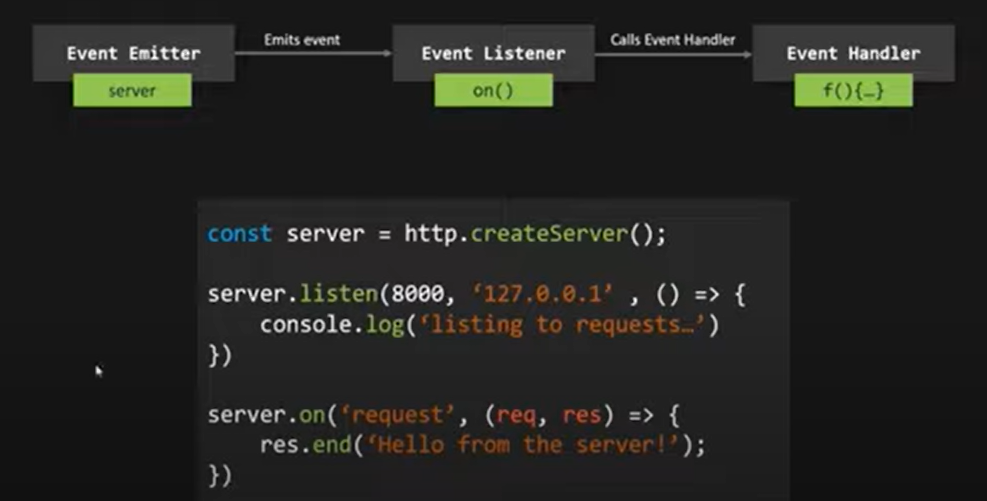

Node.js uses event driven architecture but what does it actually mean?

The concept is actually quite simple in an event driven architecture we have three main players the `event emitter`, `event listener` and `event handler`.

An event emitter emits named events when something important happens in the app. For example a request hitting the server or a timer expiring or a file finishing to read. All of these emit events and whoever is responsible for emitting these events is called as `event emitter`.

When an event is emitted or raised the event can be picked up by event listeners so basically and event listener is going to listen or we can say that it is going to wait for an event to happen

These event listeners will then fire up the Callback function attached to that event listener when that event happens so this callback function here is called as event handler.


Most of the node.js core modules like HTTP or file system and timers they're all built around an event driven architecture and we can also use this architecture to our advantage in our own code.

let's understand event-driven architecture in node.js with a simple example

let's understand how node uses event-driven architecture to handle server requests in the HTTP module. when we want to create a server we use the `createServer()` method on the `http` object then we are assigning it to a variable called `server`. Now whenever a new request will hit this `server` is going to emit a named event called `request`. So here `request` is the named event and the `server` is the event emitter because here the server is the one which is going to emit the `request` event.

Now when this named event is emitted we can listen to that named event using `on()` method like we are doing here so here we are using this `on()` method on this `server`. To this `on()` method the first parameter which we are passing here is `request`, basically the event which we want to listen to.

Since this `on()` method here is waiting for the `request` event to happen it is listening for the request event. This `on()` method here is the event listener and to this one method as the second argument we are also passing a callback function and this callback function will be executed whenever this request event will happen. So basically this callback function is going to handle the request event by executing some logic. So in this case this callback function here is the event handler function


In [ ]:
# app.js

const http = require('http');
const fs = require('fs');
const url = require('url');
let replaceHtml = require('./Modules/replaceHtml');

const html  = fs.readFileSync('./Templates/index.html', 'utf8');
let products = JSON.parse(fs.readFileSync('./Data/products.json', 'utf-8'))
let productListHtml = fs.readFileSync('./Templates/product-list.html', 'utf8'); 
let productDetailHtml = fs.readFileSync('./Templates/product-details.html', 'utf8');

const server = http.createServer(); # event emitter

server.on('request', (request, response)=>{ # on() is listening to request event
    # this function body is event hndler
    
    let {query, pathname:path} = url.parse(request.url, true);
    
    if(path === '/' || path.toLocaleLowerCase() === '/home'){
        response.writeHead(200, { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in home page"));
    }

    else if(path.toLocaleLowerCase() === '/about'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in about page"));
    }

    else if(path.toLocaleLowerCase() === '/contact'){
        response.writeHead(200,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "You are in contact page"));
    }

    else if(path.toLocaleLowerCase() === '/products'){
        if(!query.id){
            let productHtmlArray = products.map((prod)=>{
                return replaceHtml(productListHtml, prod);
            })
            let productResponseHtml = html.replace('{{%CONTENT%}}', productHtmlArray.join(','));
            response.writeHead(200,  { 
                'Content-Type': 'text/html'
            });
            response.end(productResponseHtml);
        }
        else{
            let prod = products[query.id];
            let productDetailResponseHtml = replaceHtml(productDetailHtml, prod);
            response.end(html.replace('{{%CONTENT%}}', productDetailResponseHtml));
        }
        
    }

    else{
        response.writeHead(404,  { 
            'Content-Type': 'text/html',
            'my-header': 'Hello, world'
        });
        response.end(html.replace('{{%CONTENT%}}', "Error 404: Page not found"));
    }
})


server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})


Whenever a new request hits, this `server` and then we are handling that request by executing this event handler function.

Now remember that here we are able to listen to events on the `server` object because behind the scenes the `server` object is actually an instance of Node.js `EventEmitter()` class that means this `server` object inherits all the event emitting and listening logic from the `EventEmitter()` class.

So keep in mind that **the `server` object inherits from `EventEmitter()` class and in this way whichever object in Node.js inherits from this `EventEmitter()` class on that object we can emit and listen to the events**.

This event emitting and listening logic is called as **Observer pattern** in JavaScript programming in general and it is quite a popular pattern with many use cases. So the idea is that there is an
observer in this case the event listener which keeps waiting keeps observing the subject that will eventually emit the event that the listener is waiting for.

The Observer pattern has been designed to react rather than to call and that is because there is a huge benefit of using this architecture which is the fact that everything is more decoupled. For example we don't have functions from the file system module calling functions from the HTTP module
because then that would be a huge mess instead these modules are nicely decoupled and self-contained. Each emitting event that other functions even if they come from other modules can respond to.

Also using an event-driven architecture makes it way more straightforward to react multiple times to the same event all we have to do is to set up multiple listeners.

<pre id='n15'></pre>
# Emitting and Handling custom events

In [ ]:
# app.js

const events = require('events');

let myEmitter = new events.EventEmitter(); # creating instance of EventEmitter class

myEmitter.emit("userCreated"); # emit userCreated event

myEmitter.on("userCreated", ()=>{
    console.log("A new user is created");
})

If we run this code then we will not be able to see any message. This is because when we are emitting `userCreated` event by that time event listener has not been setuped. We are setting up event listener only after emitting event and that's we are not seeing any thing in console. 

What we need to do move `emit()` after event listener:

In [ ]:
# app.js

const events = require('events');

let myEmitter = new events.EventEmitter();

myEmitter.on("userCreated", ()=>{
    console.log("A new user is created");
})

myEmitter.emit("userCreated");

What happened here is: `userCreated` event has been raised, this `on()` is listening for that event. So when this event is emited, this `on()` executed the callback function.

This `on()` is quite similar to `addEventListener()` in JS.

We can setup multiple listener on same event:

In [ ]:
# app.js

const events = require('events');

let myEmitter = new events.EventEmitter();

myEmitter.on("userCreated", ()=>{
    console.log("A new user is created");
})

myEmitter.on("userCreated", ()=>{
    console.log("A new user is added in DB");
})

myEmitter.emit("userCreated");

Our custom emitter can also emit other events like user updated or user deleted or something like that
and using this `on()` method we can add listeners for those events as well.

We can pass arguments as well to callback function:

In [ ]:
# app.js

const events = require('events');

let myEmitter = new events.EventEmitter();

myEmitter.on("userCreated", (id, name)=>{
    console.log(`A new user ${name} with id ${id} is created`);
})

myEmitter.on("userCreated", (id, name)=>{
    console.log(`A new user ${name} with id ${id} is added in DB`);
})

myEmitter.emit("userCreated", 1901, 'john'); # passing argument, If no value passed then id and name will be undefined above

If we have multiple listeners for same event, then they will run synchronously one after other in the order in which they are declared in code. 

This example where we create a custom event and handling it, it works perfect. But if we have to use this pattern in realworld project then its best practice to create new class that will inherit from NodeJS `EventEmitter` class.

In [ ]:
# Modules/user.js

const events = require("events");

module.exports = class extends events.EventEmitter{
    constructor(){
        super(); # call constructor of base class EventEmitter
    }
}

In [ ]:
# app.js

const events = require('events');
const user = require('./Modules/user');

let myEmitter = new user(); # internally inherits from EventEmitter class

myEmitter.on("userCreated", (id, name)=>{
    console.log(`A new user ${name} with id ${id} is created`);
})

myEmitter.on("userCreated", (id, name)=>{
    console.log(`A new user ${name} with id ${id} is added in DB`);
})

myEmitter.emit("userCreated", 1901, 'john');

We might say that when we were listening to event on `server` object, there we did not emit events like we doing here, so here emitting event manually. But in case of `server` object where we are listening to `request` event, we are not emitting this `request` event manually that's because there that event is implicitly by server object. We do not have to do that manually.

<pre id='n16'></pre>
# Streams in NodeJS

With streams, we can process data piece by piece instead of reading or writing the whole data at once.

**Advantages:**
- Streaming makes the data processing more efficient in terms of memory. Because there is no need to keep all the data in the memory.
- In terms of performance and time also, streaming has its advantage because we can  start processing the data as soon as the first chunk of data arrives.

In NodeJS there are four types of streams:
1. Readable stream
2. Writable stream
3. Duplex stream
4. Transform stream


In [ ]:
# app.js

const fs = require('fs');
const http = require('http');
const server = http.createServer();

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})

server.on('request', (req, res)=>{
    fs.writeFile('./Files/large-file.txt', (err, data)=>{
        if(err){
            res.end("Something went wrong");
            return;
        }
        res.end(data);
    });
});

This `large-file.txt` contains millions of lines of data and this `readFile()` will assign the content to `data` object only after it has read content of file completely.

If we make request the content of file is displayed but if we look at spinner then it is still loading continuously which means data is still loading. This spinner will only stop if data is written completely here in response.

The problem with this approach is we are reading very large file so this `data` object is going to store is huge data and once this data from `large-file.txt` has been completely read then that data will be stored in memory and from memory that data will be sent in response.

Even though this approach works just fine but the problem here is that with this solution Node will have to load entire file in memory beacuse only after that it can send data in reesponse andd this is a problem when file is big and also when tons of request hitting the server because NodejS process will very quickly run out of resources in this case and our app might quit working or everything might creash.

In [ ]:
# app.js

const fs = require('fs');
const http = require('http');
const server = http.createServer();

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})

server.on('request', (req, res)=>{
    let rs = fs.createReadStream('./Files/large-file.txt'); # read data in pieces
    
    # every time it read new piece of data, it is going to emit `data` event:
    rs.on('data', (chunk)=>{
        res.write(chunk);
        
    })
    
    rs.on('end', ()=>{
        res.end(); # will signal no more data
    })
    
    rs.on('error', (err)=>{ # handling error
        res.end(err.message);
    })
});


# response is itself is a writable stream

This `res` is itself is a writable stream. If we have to write content of this `large-file.txt` into another file in that case we have to create writable stream and then we can write this content of `large-file.txt` into another file.

<pre id='n17'></pre>
# Understanding `pipe()` method

Above we reading data piece by piece but still we have a problem here.

Let's say our readable stream is reading data with 4MB/s and writable stream is writing data with 3MB/s. Our readble stream is much faster and writable stream is bit slowand this overshelm the writable stream which cannot handle all these incoming data so fast. Here our writable stream is response stream and this problem is called as back pressure.

`back pressure` happens when the response cannot send the data nearly as fast as it is receiving it from the file and that is problem with above code.

We have to fix that problem and come up with an even better solution and to solve this problem we can use `pipe()` method:

In [ ]:
# app.js

const fs = require('fs');
const http = require('http');
const server = http.createServer();

server.listen(8000, '127.0.0.1', ()=>{
    console.log("Server has started");
})

server.on('request', (req, res)=>{
    let rs = fs.createReadStream('./Files/large-file.txt');
    rs.pipe(res); #take writable stream: writable stream, duplex stream, transform stream all are writable stream
    # in this example `res` is writable stream
})

Basically this `pipe()` method allows us to pipe the output of a readable stream and write into the writable stream.

- `pipe()` method is available only on readable stream.

It solves the problem of `back pressure` because it will automatically handle the speed of data comming in and speed of data going out.

# NPM

- `npm init`: Create package.json

**Types of dependencies:**

1. Regular Dependencies: A package is called as a simple or regular dependency if the working of our application or the code which we are writing, depends on that package.

2. Development Dependencies: A package is called as development dependency, if that package is only required for the development purpose and on which the working of our application does not depend.

**Types of package installs:**

1. Local install: The package is only available in that project folder, where the package is installed. It cannot be used outside that folder.

2. Global install: The package is installed globally in the machine and can be accessed from any folder or any project directory.

# Architecture of NodeJS

Node.js is a JavaScript runtime and this runtime has several dependencies on which it depends on to work properly and the most important dependencies are the `V8` JavaScript engine and `LIBUV`.

Node.js is a JavaScript runtime built on Google's V8 JavaScript engine. V8 engine in node.js is responsible for executing the JavaScript code which we write to create the backend application and that's why V8 is a dependency for node.js

V8 is a fundamental part of node architecture V8 engine is responsible for converting JavaScript code into machine code that a computer can actually understand and execute. V8 engine alone is not enough to create a whole server-side framework like node.js and that's why we also have LIBUV.

In node LOBUV is an open source library with a strong focus on dealing with asynchronous input output.
If you have worked with JavaScript in browser then you already know that when we use JavaScript in browser it does not allow us to access underlying clients operating system of file and folders. There we cannot use JavaScript to read or write file from the client's machine because of security reasons but we have that capability with JavaScript when we use it in node.js and this capability is provided by LIBUV.


LIBUV gives node access to underlying computers operating system file system, networking and many more things and that's why it's another important dependency of node.js runtime.

Besides that LIBUV also implements two extremely important features of node.js and these are event Loop and thread pool.

`Event Loop` in node.js is responsible for executing easy tasks like executing callback functions and network I/OS on the other hand `thread pool` is used to process heavy tasks like file access or compression or anything like that.

LIBUV is actually completely written in C++ and not in JavaScript also V8 engine is also written in C++ language along with JavaScript.


Speaking of other libraries node actually does not rely only on V8 engine and LIBUV as its dependencies it also has other dependencies like HTTP PARSER for parsing the HTTP, C-ARES for some DNS
request stuff, OPENSSL for cryptography and ZLIB for compression and these are not that important to
understand for now.

So in the end when we have all these dependencies nicely fit together we end up with node.js runtime ready to be used on the server side for our application and this is a very high level overview of node.js architecture.


Now let's understand the working of this architecture in more detail and before that let's first try to understand what a process, thread, and thread pool is.

- A process is what facilitates the execution of a program. In simple words a process is just a program which is currently executing for example when we

- Every process has by default a single main thread which is responsible for executing the program code in the process. A thread in a process is responsible for executing the program code.

In node.js we don't have option to create multiple threads programmatically so node.js programs are executed inside one single thread.

let's Now quickly understand what exactly happens in the single thread when we start our node application.

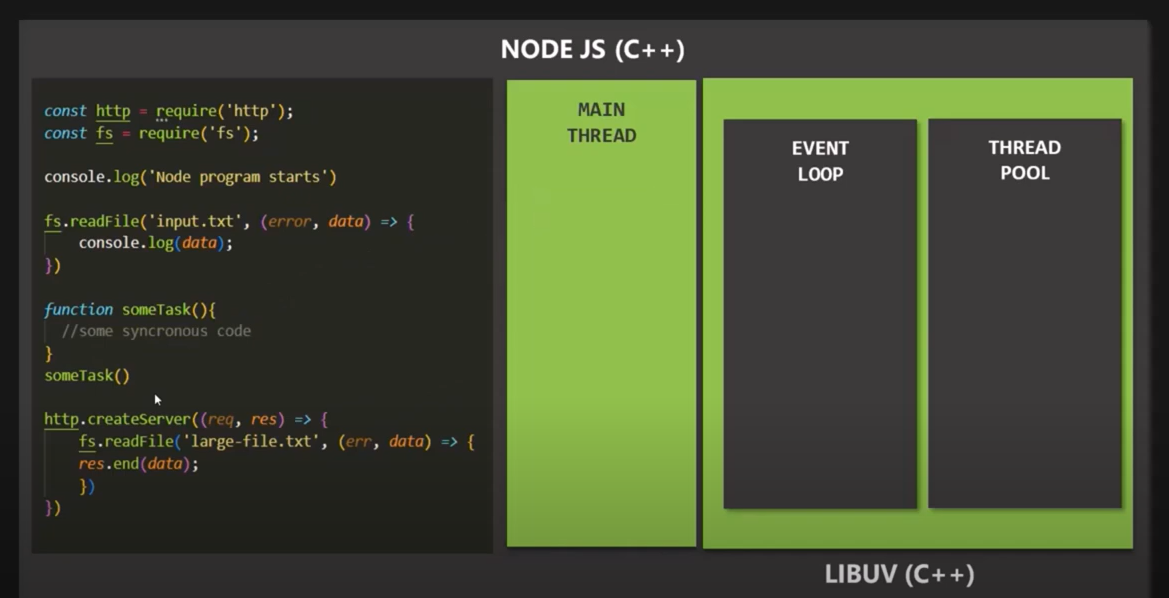

Here we have a simple node program now when we run this node.js program all the modules that our node application needs that will be required and imported and that will happen in the main thread.

- `require` statement will be executed in the main thread

Then also all the top level codes that means the code which is not inside any callback function will be executed and it will also get executed in the main thread.

- So in this program this `console.log` statement this is the top level code. This `someTask()` function this is also the top level code so these codes will be executed in the main thread

Now all other codes which runs asynchronously like file system functions they are not executed in the
main thread, they are executed in the background and that background here is the thread pool.

- So the functions like this `readFile` which runs asynchronously or this `createServer` which also runs asynchronously these functions will not get executed in the main thread they will be executed in the thread pool.

With these functions(`readFile `and `createServer`) we also have a callback function right. So to this `readFile` function we are also passing a callback function which will be called when the job of this `readFile` function is finished.

So let's say when this `readFile` function is executed in the thread pool, it is reading this input.txt file once its job is complete that is once it has completely read the data from this input.txt file its job will be complete and the Callback function attached to this `readFile` function that will be pushed to the event Loop and in the event Loop this callback function will wait for its execution. the Callback function here will not get executed immediately. `The Callback functions which Waits inside the event loop that gets executed when the main thread is empty that means when all the
top level code has already executed`.

In the same way this `createServer` function is also going to run asynchronously so that will be also
pushed to the thread pool where it will do its job and once its job is complete the Callback function registered with this `createServer` function that will also get pushed to the event Loop and there that callback function will wait for its execution.

When the execution of all the top level code is complete then only the execution of the Callback function sitting in the Callback queue or sitting in the event Loop it will start.

So basically once the execution of top level code is complete the event Loop finally starts and event Loop simply pushes callback functions from callback queue to the main thread where those callback function gets executed.

Above now we learnt that the Callback functions which Waits inside the Callback queue it also gets executed in the main single thread so if the Callback function is going to perform some heavy tasks like file reading or writing it can block the main thread. 

If you see the Callback function which we are passing to this `createServer` method inside this callback function we are trying to read a file using this `readFile` method. So this task here it might take some time it is a heavy task.

So if that callback function is going to perform some heavy task in that case that task will not get executed in the main thread that task will again will be passed over to the thread pool where it will do its job and that heavy task will be executed in the thread pool in some other thread and not in the main thread.

Keep in mind that all the heavy tasks which cannot be handled by the event Loop it is offloaded to the thread pool which can then execute it asynchronously without blocking the main thread. So event Loop basically performs simple tasks and it offloads heavy tasks to the thread pool.

In node.js by default we get four additional threads in the thread pool which are completely separate from the main single thread and we can actually configure it up to 1024 threads but usually these four are enough and these threads together form a thread pool and all this happens automatically

We as a developer annot decide what code will be executed n the thread pool and which code will ot get executed in the thread pool hat's all happens behind the scenes automayically.


Nw the expensive tasks which can get offloaded to the thread pool are those perations like dealing with the files verything related to cryptography like hashing password then all the compression related tasks and also DNS lookups which basically matches web domains to their corresponding real IP address.
So these are the things that would most commonly block the main thread and so node takes care of automatically offloading these heavy tasks to the thread pool where they don't block the main single thread and this is how node.js Works behind the scenes.

Now we have learnt that the heart of node.js architecture is actually the event Loop event Loop does most of the work in node.js 

# Event loop

In simple words the event Loop receives events each time something important happens and then it is responsible for executing the callbacks in the main thread that we Define for each of these events that's why it is said that event Loop does the orchestration which simply means that the event Loop receives a callback functions whenever an event happens executes the simple task in the main thread and offload the heavy tasks to the thread pool.

Now the question is **how does all this work behind the scenes in what order all these callback functions are actually executed ?**

Keep in mind that the event Loop starts immediately as soon as the node.js application starts whenever an event will happen event Loop will store the Callback function attached to that event and it will wait for the completion of the execution of top level code when all the top level code is executed the main thread will be empty and then the event Loop will start its job it will start pushing callback functions in the main thread or offloading it to the thread pool for their execution.

An event Loop has multiple phases and in each phase of an event Loop we have a separate callback queue. The Callback queue is basically where the event Loop stores the Callback function attached to an event.

Each phase has its own callback queue (in some tutorials or articles you might read that there is only one callback queue for the entire event Loop in node.js but that's not true).

let's take a look at four most important phases of an event Loop there are one or two other phases which are used internally by node.js but these are not that important and we are not going to talk about them.

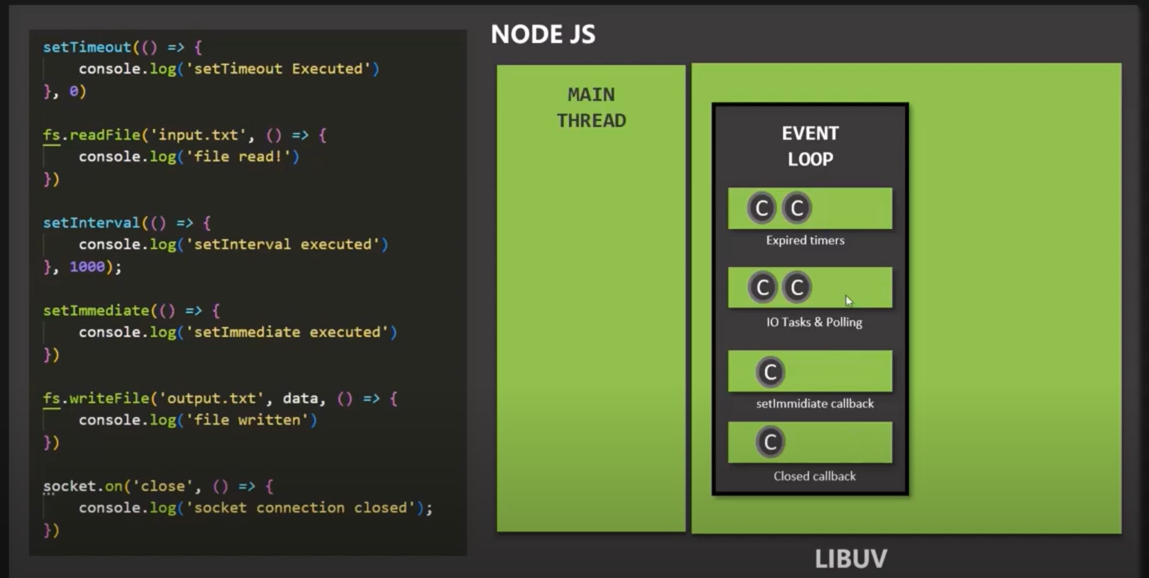

If you notice each phase has its own callback queue and in these callback queues we have some callback functions waiting for their execution.

In the first phase the Callback functions attached to the timer are stored. So basically when a timer expires the Callback function attached to that timer will be stored in the Callback queue of first phase of event Loop so in this first phase the Callback queue attached to the timers will be stored.

For example the Callback function attached to `setTimeout()` or `setInterval()` whenever these timers will expire the Callback function attached to these functions they will be pushed to the Callback queue of this first phase and there these callback functions will wait for the execution.
As soon as the main thread is empty the Callback function from the Callback queue of this first phase will be pushed to the main thread and there those callback functions will be executed.

**The Callback functions related to the `timers` are the first to be executed in the event Loop if there is any**.

Now let's see a timer expires later during the time when one of the other phases are being processed in that case the Callback of that timer will be only processed as soon as the event Loop comes back to the first phase.

Let's say the event Loop has started and in the first phase initially we don't have any callback functions the event Loop will move to the second phase and once the event Loop has moved to the second
phase if a timer expires it will be stored in the Callback queue of first phase but it will not get executed immediately. The event Loop will first execute all the Callback functions in the current phase and currently the event group is in second phase so it will execute the Callback functions of the second phase it will move to the third phase there it will execute the Callback functions of the third phase then it will move to the fourth phase there it will execute the Callback functions of fourth phase and once the fourth phase is complete it will again go back to the first phase and then it will execute the Callback function of the expired timer and this is how it works for all the phases.


All the phases will be executed one by one and if a phase receives a new callback function and it is not currently being processed in that case that callback function will have to wait and it will be executed once the event Loop reaches back to that particular phase.

Also the callbacks in each queue are processed one by one until there is no callback function left in the Callback queue and only then the event Loop will enter the next phase.

Let's say we are in the first phase and in the first phase. let's say we have seven callback functions so once all those seven callback functions are executed then only the event Loop will move to the second phase and once all the Callback function in the second phase are executed then only the event Loop will move to the third phase and this is how it works.

In simple words when the Callback queue of the current phase is empty that is if there is no more callback functions in that callback queue to process then only the event Loop will move to the next phase.

-  A callback function attached to networking or file read and write related tasks are stored in the Callback queue of second phase.

In this example the Callback function attached to this `readFile` function and this `writeFile` function that will be executed in the second phase. 

- Second phase also does the polling here polling simply means looking for new i o events that are ready to be processed

- if there is some code which you want to execute immediately as soon as the second phase is complete you can write that code inside the Callback function of `setImmediate`.

- In fourth phase all the closed callbacks are stored for example when a web server or websocket shutsdown.

Basically any callback attached to close event will be executed in this phase so when a web server or websocket shuts down a close event is emitted the Callback function attached to that close event is stored in the Callback queue of this fourth phase and once the main thread is empty that callback function will be executed in that main thread but if that callback function is doing some heavy task it will be uploaded to the thread of a thread pool and there it will be executed.

In [ ]:
console.log("program has started")

console.log("program has completed")

# Output:
program has started
program has completed

In [ ]:
console.log("program has started")

// STORED IN - 1ST PHASE:
setTimeout(()=>{
  console.log("timer callback executed");
}, 0)

"""
this set timeout will be executed asynchronously okay so it will run in the background and since
it is going to run in the background it will not stop the execution of next line of code it will 
not block the execution of next line of code. 
"""

console.log("program has completed")

# Output:
program has started
program has completed
timer callback executed

once the execution of all the top level code is complete then the event Loop will start and when the event Loop will start it will first go to the first phase of the event Loop now in the first phase of the event Loop since here we have specified the time interval as 0 this `setTimeout` will expire immediately and since it is going to expire immediately this callback function will be pushed to the Callback queue of first phase immediately so once the execution of top level code is complete the event Loop will start it will go to the first phase in the first phase it will find this callback function waiting for its execution and since the main thread is empty now because all the top level code has beenexecuted already the event Loop will push this callback function to the main thread and then in the main thread this callback function will be executed

In [ ]:
console.log("program has started")

// STORED IN - 1ST PHASE
setTimeout(()=>{
  console.log("timer callback executed");
}, 0)

// STORED IN - 3RD PHASE
setImmediate(()=>{
  console.log("setImmediate callback executed")
})

console.log("program has completed")

# Output:
program has started
program has completed
timer callback executed
setImmediate callback executed

now when the program will start again first the top level code will be executed that means this line of code and this line of code it will be executed in the main thread and once the execution of top level code is complete that means once the main thread is empty the event Loop will start and the event Loop will first go to the first phase in the first phase we have this callback function so this will be pushed to the main thread from the Callback your first phase and it will be executed in the main thread then the event Loop will go to the second phase in the second phase we don't have any callback function because here in this program we don't have written any i o related task so we don't have any callback function related to IO related task so that's why the second phase will be empty so the event Loop will now move to the third phase in the third phase the Callback function attached to the set immediate it is waiting it is stored so now this callback for function will be pushed to the main thread and it will be executed.

Here in this example both the `setTimeout` function and the `setImmediate` function it is going to expire immediately but according to node.js documentation the `setImmediate` should always expire before any other timer but that is not always the case so this is a bug which is already known in node.js and because of that you might see different order of execution for the Callback function attached to `setTimeout` and for the Callback function attached to `setImmediate`.

In [ ]:
console.log("program has started")

// STORED IN - 1ST PHASE
setTimeout(()=>{
  console.log("timer callback executed");
}, 3000) # now 3 second

// STORED IN - 3RD PHASE
setImmediate(()=>{
  console.log("setImmediate callback executed")
})

console.log("program has completed")

# Output:
program has started
program has completed
setImmediate callback executed
timer callback executed

In [ ]:
const fs = require('fs')

console.log("program has started")

// STORED IN - 1ST PHASE
setTimeout(()=>{
  console.log("timer callback executed");
}, 0)

// STORED IN - 2ND PHASE
fs.readFile('./sec.js', ()=>{ # I/O task are performance intensive
    # that means they are not complete their task immediately
  console.log("file read completed")
})

// STORED IN - 3RD PHASE
setImmediate(()=>{
  console.log("setImmediate callback executed")
})

console.log("program has completed")

# Output:
program has started
program has completed
timer callback executed
setImmediate callback executed
file read completed

When this program will run first of all top level codes will be executed so the first output should be "program has started" and the second output should be "program has completed" then since the top level code has finished executing the event group will start and the event Loop will first go to the first phase in the first phase this callback function is waiting for its execution because here the time interval is 0 milliseconds so it will expire immediately so the third output should be "timer callback executed" then it will go to the second phase in the second phase the Callback function attached to i/o tasks are stored so in our program this read file is an i/o task and keep in mind that i/o tasks are performance intensive that means they are not going to complete their job immediately they are going to take some time for example this `readFile` method might take some time in reading this input.txt so it is not going to finish its job immediately and the `Callback function related to an i/o task that will be pushed to the Callback queue of second phase only when the i/o task has finished its job`. 

In this case when this read file method has finished reading all the content from this input.txt. So when the event Loop will reach to the second phase so the Callback function related to this i/o task that will be stored in the Callback queue of second phase so by the time the event Loop will reach to the second phase by that time this read file might not have completed its job that means this callback function is not yet pushed to the Callback queue of second phase that means the second phase is still
empty so the event Loop will move to the third phase in the third phase it will find this callback function because this `setImmediate` it will expire immediately so this callback function will be pushed to the Callback queue of third phase immediately so in there it will find this callback function and it will execute it so the fourth output should be "setimmediate callback executed" then the event Loop will go to the fourth phase in the fourth phase we have closed callbacks here in this program we don't have any closed callbacks so the one tick of the event Loop is complete.

Now the event Loop will check if there is any other timer related tasks or i/o related tasks waiting for its execution and let's say by that time this `readFile` has completed its job and it has pushed this callback function in the Callback queue of second phase so now in the second phase there is a callback function related to an i/o task is waiting for its execution so now the event Loop will start the next tick in the next day it will first go to the first phase in the first phase we don't have any callback function to be executed then it will go to the second phase and in the second phase in the Callback queue of the second phase this callback function is waiting for its execution so now this callback function will be pushed to the main thread and there it will be executed and it will log this message "file read completed".

In [ ]:
const fs = require('fs')

console.log("program has started")

// STORED IN - 2ND PHASE
fs.readFile('./sec.js', ()=>{
  console.log("file read completed")

  // STORED IN - 1ST PHASE
  setTimeout(()=>{
    console.log("timer callback executed");
  }, 0)

  // STORED IN - 3RD PHASE
  setImmediate(()=>{
    console.log("setImmediate callback executed")
  })

})

console.log("program has completed")

# Output:
program has started
program has completed
file read completed
setImmediate callback executed
timer callback executed

When we run this program first of all the top level code will be executed and now we don't have any other code in the top level so now the event Loop will start when the event Loop starts first it will go to the first phase now at the top level we don't have any timer related tasks right at the top level we don't have any call to `setTimeout` function or `setInterval` function so we don't have any code related to expired timers in the top level that means the first phase is empty then the event Loop will move to the second phase let's say by that time this `readFile` has completed its job so that means this callback function will be pushed to the Callback queue of second phase and since the event Loop is in second phase it is going to push this callback function in the main thread and in the main thread this callback function will be executed so when this callback function will be executed first it is going to log this message "file read completed" in the console then it will go to the next line in, this line we are calling this `setTimeout` and again this `setTimeout` is an asynchronous task so it will execute in the background and since the time interval here is zero milliseconds this `setTimeout` will expire immediately and this callback function will be pushed to the Callback queue of first phase then the next line of code will be executed here we are calling the `setImmediate` and since it is going to expire immediately this callback function will be pushed to the Callback queue of third page now the execution of this callback function is complete then the event Loop will move to the next phase and the next phase is third phase.In the third phase this callback function is waiting for its execution so now this callback function will be pushed to the main thread and this statement will be logged in the console and once the execution of this callback function is complete the event Loop will move to the fourth phase we don't have any closed callbacks so the fourth phase is empty now the event Loop will check if there is any timer or i/o related task waiting for its execution and then
this callback function is waiting for its execution in the first phase of the event Loop so the next tick will start and in the next tick the event Loop will go to the first phase and it will push this callback function in the main thread and there it will be executed and this callback function will be logged.

<hr>

we also learned about some special callback queues for example the `microtask` queue and `process.nextTick` and we learnt that `microtask` queue or the `process.nextTick` they don't belong to any phase these are the special callback queues and the Callback functions stored in these callback queues gets executed immediately after the execution of the current phase is complete

let's understand this with an example: 

In [ ]:
const fs = require('fs')

console.log("program has started")

// STORED IN - 2ND PHASE
fs.readFile('./sec.js', ()=>{
  console.log("file read completed")

  // STORED IN - 1ST PHASE
  setTimeout(()=>{
    console.log("timer callback executed");
  }, 0)

  // STORED IN - 3RD PHASE
  setImmediate(()=>{
    console.log("setImmediate callback executed")
  })

  process.nextTick(()=>{
    console.log("process.nextTick callback executed");
  })

})

console.log("program has completed")

# Output:
program has started
program has completed
file read completed
process.nextTick callback executed
setImmediate callback executed
timer callback executed

first the top level codes will be executed in the main thread so the first two outputs will be "program has started" and "program has completed" then the event Loop will start and in the event Loop first the event loop will go to the first phase in the first phase we don't have any callback function waiting for its execution why because in the top level code we don't have any timer related tasks so now it will move to the second phase now let's see when the event Loop reaches to the second phase by that time this read file has completed its job that means this callback function is already pushed in the Callback queue of second phase so the event Loop will push this callback function from the Callback queue of second phase to the main thread for its execution so there the execution of this callback function will happen this first line of code will be executed and it is going to log this message "file read completed" then it will find this `setTimeout` function so since this function is going to be executed asynchronously and since it is expiring immediately this callback function will be pushed to the Callback queue of first phase then it will move to the next line there it will find the set immediate again it is also going to expire immediately so this callback function will be pushed to the Callback queue of third phase and then it will find this `process.nextTick` method so this callback function will be pushed to the Callback queue of `process.nextTick` and in this way the execution of this callback function is complete.

now this callback function was stored in the Callback queue of second phase so which is the currently
executing phase here the currently executing phase here is the second phase and **we learned that once the execution of currently executing phase is complete if there is any callback function in the `micro task` queue or `process.nexTick` that will be executed next.

22:32
    so when this callback function of `readFile` was executing in there we pushed this callback function into the `process.nextTick` so now after the execution of this callback function is complete there is a callback function in process.nxtq which is waiting for its execution and that callback function will be executed immediately after the execution of current phase and the currently executing phase in our example is this second phase because this callback function was stored in the Callback queue have second phase so once the execution of current phase is complete now the node.js will check if there is any callback function waiting inside the `microtask` queue or `process.nextTick` and yes we do have a callback function which is waiting in the Callback queue of `process.nextTick` so that will be executed next.

so after the execution of this callback function of `readFile`, the Callback function attached to `process.nextTick` will be executed so the next output will be `process.nextTick` callback executed and once this callback function is executed then the event Loop will move to the next phase so now it was in second phase now it will move to the third phase in the third phase this callback function is waiting for its execution so it will be executed and this message will be logged in the console and after that it will go to the fourth phase the Callback queue of fourth phase is empty so now the event Loop will check whether it has to start the next tick or not and how the event Loop checks that it checks it by checking if there is any timer related callback or i/o task related callback waiting for its execution in the Callback queue and yes in our case this callback function is waiting in the Callback queue of first phase for its execution so again the next tick will start in The Next Step the event 2 will go to the first phase and it will execute this callback function so the last output should be timer callback executed after that the second phase third phase and fourth phase is empty.

# Express JS

Express JS is a free and open source web application framework for NodeJS.

In simple words we can say that express help us develop NodeJS application by writing minimum NodeJS code. It simplifies complex NodeJS code with simple one or two line of codes.

- Express is completely build on NodeJS
- It is one of the most popular framework for NodeJS
- Express contains very robust and useful set of features
- Express allows to write NodeJS application faster and simpler
- With express we can organize NodeJS code in MVC arxhitecture

In [ ]:
# app.js

const express = require('express');
let app = express();  # Create an instance of Express

#  'app' variable will be used to set up the routes and middleware and other functionalities.

app.get('/', (req, res)=>{ # define a route that listens for `GET` requests
    
    res.status(200).send("Hello from express server!"); # html response can also be sent
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

- The `get()` method is used to define a route that listens for `GET` requests on a specified path. When a GET request matches the specified path, the provided callback function is executed.
- The `send()` method is used to send a response to the client. It can send various types of content, such as strings, JSON, arrays, or objects.
- The `listen()` method binds and listens for connections on a specified host and port. It starts the Express application and makes it ready to handle incoming requests.
- the `res.status()` method is used to set the HTTP status code of the response. It allows you to specify what kind of response the server is sending back to the client, such as success, client error, or server error. This method is part of the `response` object (`res`) and is typically chained with other methods like `res.send()`, `res.json()`, or `res.end()` to send the response back to the client.

<hr>

When we use `send()` method to send response, then content-type of response is by default set as `text/html`. But let's say we want to send some JSON response, in that we cannot use `send()` method. So, instead of send() we need to use `json()`. No the content-type will be set as `application/json`

In [ ]:
# app.js

const express = require('express');
let app = express();

app.get('/', (req, res)=>{
    res.status(200).json({message: "Hello from express server!", status:200});
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

In [ ]:
# app.js

const express = require('express');
let app = express();

app.get('/', (req, res)=>{
    res.status(200).json({message: "Hello from express server!", status:200});
})

app.post('/', ()=>{ # post request
    # write the logic
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

- **`res.set()`**:
        res.set('Content-Type', 'text/plain');
        res.set({
            'Content-Type': 'text/plain',
            'Content-Length': '123',
            'ETag': '12345'
        });

- **`res.type()`**:
        res.type('application/json');
        
- **`res.jsonp()`**:
        res.jsonp({ message: 'Hello World' });

- **`res.sendFile()`**:
        res.sendFile('/path/to/file.pdf');

- **`res.download()`**:
        res.download('/path/to/file.pdf');
        
- **`res.render()`**:
        res.render('index', { title: 'Express' });
        
- **`res.redirect()`**:
        res.redirect('/home');
        res.redirect(301, '/home');

- **`res.cookie()`**:
        res.cookie('name', 'value', { maxAge: 900000, httpOnly: true });

- **`res.clearCookie()`**:
        res.clearCookie('name');

- **`res.end()`**:
        res.end();
        res.end('Goodbye\n');


# Detailed Breakdown of the req Object

Apart from `req.url`, the request object (`req`) has several other useful properties and methods:

#### Properties:

- req.app: A reference to the Express application that is using the middleware.
- `req.baseUrl`: The URL path on which a router instance was mounted.
- `req.body`: Contains key-value pairs of data submitted in the request body. This property requires body-parsing middleware (e.g., body-parser).
- `req.cookies`: Contains cookies sent by the request. This property requires cookie-parsing middleware (e.g., cookie-parser).
- req.fresh: Indicates whether the request is "fresh" (i.e., it is not modified since the last request).
- req.hostname: The hostname derived from the Host HTTP header.
- req.ip: The remote IP address of the request.
- req.ips: An array of IP addresses specified in the X-Forwarded-For header.
- `req.method`: The HTTP method of the request (e.g., GET, POST).
- req.originalUrl: The original request URL, including the query string.
- `req.params`: An object containing route parameters (captured groups in the route path).
- `req.path`: The path portion of the request URL.
- req.protocol: The request protocol (e.g., HTTP or HTTPS).
- `req.query`: An object containing the query string parameters.
- `req.route`: The currently matched route.
- req.secure: A boolean indicating if the request was made via HTTPS.
- req.signedCookies: Contains signed cookies sent by the request. Requires cookie-parsing middleware with signing support.
- req.stale: The opposite of req.fresh.
- req.subdomains: An array of subdomains in the request URL.
- req.xhr: A boolean indicating if the request was made with XMLHttpRequest.

#### Methods:

- req.accepts(types): Checks if the specified content types are acceptable, based on the request’s Accept HTTP header.
- `req.get(field)` / `req.header(field)`: Returns the specified HTTP header field.
- `req.is(type)`: Returns true if the incoming request’s Content-Type HTTP header matches the specified MIME type.

# Common status code

- `200` OK: The request was successful.
- `201` Created: The request was successful and a resource was created.
- `400` Bad Request: The server could not understand the request due to invalid syntax.
- `401` Unauthorized: The client must authenticate itself to get the requested response.
- `403` Forbidden: The client does not have access rights to the content.
- `404` Not Found: The server cannot find the requested resource.
- `500` Internal Server Error: The server encountered an unexpected condition.

# What is web API?

**Static website** : In case of static website there is no work done on the server and there is no backend code and there is also no backend application whatsever running on the server. The server is simply serving static files like HTML, CSS, JS, images etc.

**Dynamic website** : In case of dynamic website, we also have a backend application running on the server. This backend applicatiojn can be built using NodeJS, Python, PHP, C#, etc. Now this backend application fetches data from the database and together with the predefined template. It builds each page that user requests dynamically based on data coming from the database. So each time the browser requests a page the web page is builts as HTML, CSS and JS file and sent back to the browser and then the browser renders that dynamically generated HTML, CSS and JS and show it to the user. Now this whole process is called as `server side rendering` because it is created on the server so this type of website is called as dynamic website.

**API** : An API is a piece of software that can be used by another piece of software in order to allow applications to talk to each other.

**API powered website** : An API powered website also, we have database on the server and we have an app that fetches data from the database each time a client makes a request. It is quite similar to dynamic website that means both works dynamically, big difference here is that with web API we only send the data in response to client, we do not send HTML in response. This data which we send in response is usually in the JSON format.

When building a web API powered website there are always two steps involved: `building an API` and `consuming that API`.

The main advantage of using a web API is that it cannot only be consumed by browsers but also by other clients like iOS app, android app, desktop app etc.

APIs are not always used for sending data. The "Application" in API can actually mean many different things as long as the piece of software is relatively standalone.

- the `fs` and `http` module in NodeJS are also API
- browsers DOM APIs like `fetch` and `getElementById`
- a class in a programming language containing methods and properties

# REST architecture

REST is an archtectural style for providing standards between computer systems on the web, making it easier for systems to communicate with each other. It is basically a way of building web APIs in a logical way making them easy to consume.

To build RESTful APIs that is the APIs which follows the REST architecture, we just need to follow a few principles which every REST API should have to.

`1. Seprate APIs into logoical resources`

`2. Exposed structred, resource based URL`

`3. Use HTTP methods`

`4. Send JSON data in response`

`5. API must be stateless`

# Handling GET request

In [ ]:
# data/movies.json

[
    {
        "id": 1,
        "name": "Sholay",
        "releaseYear": 1998,
        "duration": 200
    },
    {
        "id": 2,
        "name": "Race",
        "releaseYear": 2002,
        "duration": 180
    },
    {
        "id": 3,
        "name": "DDLJ",
        "releaseYear": 2000,
        "duration": 220
    }
]

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({ # json-json formatting
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Handling POST request

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.post('/api/v1/movies', (req, res)=>{
    console.log(req.body); # right it will not have any body. To attach request body we have to use middleware
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Out of box express does not put that body data on the request. So this object which we receiving as the argument this request object is not going to receive the body data. `req` does not have `body` property.

Solution here is we need to use middleware. In order to attach request body to this request object we need to use middleware and to use the middleware on this app object we need to use `use()` method and to this `use()` method we need to pass the middleare which we want to use. Here middleware that we want to use is `express.json`.

In simple word a middleware is just a function that can modify the incoming request data. Its called middleware because it stands in the middle of the request and response.


In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json()); # middleware to attach request body

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.post('/api/v1/movies', (req, res)=>{
    console.log(req.body); # now req will have body
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now we want to save this data in data source. In our case data source is `movies.json`

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body); # assign will merge these two object and create single object
    movies.push(newMovie);
    
    # if we use writeFileSync then it will block event loop and we don't want to do that

"""
whenever we make a POST request to server, on server a new object will be created on server.
So in the response we should get that new object which has been created on server.
"""   
    
"""
here we are using writeFile method inside callback function ((req, res)=>{}) and this callback will be 
executed by event loop. So if we use writeFileSync which run synchronously in that it will
block event loop and we don't want to do that
"""

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Handling route parameters

Route parameters are named URL segments that are used to capture the values specified at their position in the URL.

**Example:** `http://localhost:3000/api/v1/movies/5`

In [ ]:
# app.js


const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    console.log(req.params);
    res.send("Test movie");
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Above we are specifying one route parameters, but we can specify mutiple parametrs as well like this: `app.get('/api/v1/movies/:id/:name/:x', (req, res)=>`

URL for above will be like: `http://localhost:3000/api/v1/movies/2/john/32`

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id/:name/:x', (req, res)=>{
    console.log(req.params); # { id: '2', name: 'john', x: '32' }
    res.send("Test movie");
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Above if we do not provide all parameters then we gone get error.

To make parameter optional we can use `?`:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id/:name/:x?', (req, res)=>{ # making third parameter as optional
    console.log(req.params);
    res.send("Test movie");
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now what we want is whatever value we receiving for this id property based on that id we want to get the movie object with that particular id:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    const id = req.params.id*1; # converting string (req.params.id return string) into integer
    
    let movie = movies.find(el => el.id === id); 
                            # el element is object that have movie details like id, name, duration...

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

The problem with above code is that we pass the id that do not exist then it gone return empty data. We want to display message like "movie not found":

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json")); # movies is array of object

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Handling Patch request

**PUT vs PATCH**

- PUT is a method of modifying resource where the client sends data that updates the entire resource.
- PATCH is a method of modifying resources where the client sends partial data that is to be updated without modifying the entire data.

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
})

app.patch('/api/v1/movies/:id', (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);
    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

If we pass the id which does not exist then we get error. We can fix by:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
})

app.patch('/api/v1/movies/:id', (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Handling Delete request

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

app.use(express.json());

app.get('/api/v1/movies', (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
})

app.get('/api/v1/movies/:id', (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
})

app.patch('/api/v1/movies/:id', (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
})

app.delete('/api/v1/movies/:id', (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
})

app.post('/api/v1/movies', (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
})

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now we are going to refactor this code. Basically what I am going to do is I'm going to keep all the route handler functions here at one place:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

app.use(express.json());

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.get('/api/v1/movies', getAllMovies);
app.get('/api/v1/movies/:id', getMovie);
app.post('/api/v1/movies', createMovie);
app.patch('/api/v1/movies/:id', updateMovie);
app.delete('/api/v1/movies/:id', deleteMovie);


const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

We can further refactor the above code:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

app.use(express.json());

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)
app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

- The `app.route()` method provides a way to create route handlers for a particular path without having to repeat the path for each HTTP method. This method is useful for defining multiple requests (such as GET, POST, PUT, DELETE, etc.) for the same path.

# Understanding Middleware in Express

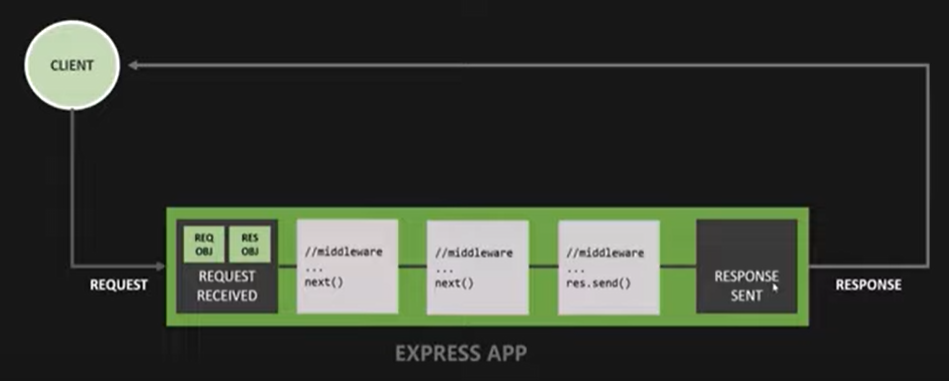

Whenever the express app receives a request from the client it first creates the request and response object. This is the same request and response object which is received as an argument for the route Handler functions. 

Now this data this request and response object will be then used and processed in order to generate and send back a meaningful response. In order to process that data in Express we use something called as `middleware`.

Middleware can also be used to execute any other code as well it need not to be always about request and response object but usually it's mostly used on request object. For example we used `express.json()` middleware to get the request body on the request object.

Most of the time when we create a middleware that middleware can be executed for all the requests.

In technical terms all the middleware together that we use in our app is called as the `middleware stack`. 

Keep in mind here is that the **order of the execution of middleware in the stack is same as the order in which they are defined in the code**. The middleware that appears in the code first will be executed first then thenext middleware in the code is executed and so on the last one to appear in the code will be executed last. 

###  how does a middleware work ?

Basically the request and response object that we created in the beginning they go through each middleware where they are processed or some other code gets executed then at the end of each middleware function a `next()` function is called which is a function that we have access to in each middleware function.

Basically after the middleware function code is executed and `next()` function is called from within the middleware function the next middleware function in the stack will be called and executed and in each middleware some processing of request or response object will happen or some code will be executed and the same thing happens in all the middleware in this stack until we reach the last one.

So in this way the initial request and response object goes through each middleware step by step now **the last middleware function is usually a route Handler function so in this middleware we do not actually call the `next()` function because this one is the last middleware in the stack**.

So **in the last middle area function instead of calling the `next()` function we finally send the response data back to the client** and in this way the request response cycle is finished for that particular client request.


# Creating a custom middleware

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
}

app.use(express.json()); # will be applied on all request
app.use(logger); # will be applied on all request

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)
app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)


const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now what will happen is whenever we make a request, on that request first of all the request body will be added by `express.json()`and after that message will be logged in the console by this `logger` middleware.

If we make request now, we will not see anything since we have not called `next()` method. We are still stuck in the same middleware in this logger middleware so here the `next()` middleware is not getting called. To resolve this issue we need to call `next()`:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json()); # will be applied on all request
app.use(logger); # will be applied on all request

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)
app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)


const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Route handler function are also a kind of middleware but they are applied only to a specific route but these **middleware which we are defining here they are applied to all type of requests `atleast if the route handler comes before this middleware`**.

So, if we move this middleware after the route handler then this logger will not be applied on the request that is made on endpoints `/api/v1/movies` that is message will not be logged into console above request:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json()); # will be applied on all request


const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)

app.use(logger); # will not be applied on above request url

app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)


const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

That's because these route handlers here comes before this logger middleware so these route handlers which is also a middleware ends the request response cycle before this logger middleware can be called.

So if we go to this rote handler function `getAllMovies` and when this function is called we can see that from here we are sending a JSON response and by sending the response using this `json()` method we are actually ending request response cycle. So the next middleware in the stack which in this case is the logger middleware that will not be called because request response cycle has already been finished.

**Always remember order in which the middleware are defined in Node matters alot.**

**If you are creating a middleware and you want that middleware to be applied on all types of request then define and use that middleware before all route handlers**.

Let's create another middleware. **We can also define middleware function inside this `use()` method itself**.

Let's say we have some route handlers that really needs the information about when exactly request was made so what we want is on this request object we want to add a new property called `requestedAt` and to this we want to assign the time when the request was made. Once we have written the middleware logic, let's call the `next()` function so that next middleware in stack can be called:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt, # from above middleware which is defined inside use()
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)
app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Using third party middleware - morgan

- `npm install morgan`

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev')); # will be applied on every request

"""
above we use `()`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    because they are not middleware function, they will return a function and that
function will act as middleware function
"""
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

app.route('/api/v1/movies').get(getAllMovies).post(createMovie)
app.route('/api/v1/movies/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

When we make any request then this `morgan` gone give type of request we made, URL, status code, time taken to send response and size of response.

# Mounting routes in Express

When we use `app.use()` to use the middleware that middleware is applied on all the requests but there is another there is another version of this `use()` method which we can use to apply a middleware only to a cetain routes.

Currently in our code we can say that all our routes are on the same router and that router is `app`.

Let's say we want to create a new route for users resource that also we will create on the app router here. Butif we want to separate there routes into different files for example one file for routes related to movies resource and other files for routes related to users resource then the best thing to do is to create one router for each of these resource.

To achieve this:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

let app = express();
let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev'));
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}


const moviesRouter = express.Router(); # return a middleware hence moviesRouter is middleware
const userRouter = express.Router();
# Resson for creating router is to move routes in separate files

moviesRouter.route('/').get(getAllMovies).post(createMovie)
moviesRouter.route('/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)

app.use('/api/v1/movies', moviesRouter);
"""
 If we use router middleware like this: app.use(moviesRouter);
 then it will be applied on all routes but we want to apply moviesRouter middleware only on routes
 that '/api/v1/movies' that's why we have used: app.use('/api/v1/movies', moviesRouter);
"""

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

# Creating and using routes module

In [ ]:
# Routes/moviesRoutes.js

const express = require('express');
const fs = require('fs');

let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

// ROUTE HANDLER FUNCTIONS:
const getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

const getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

const createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

const updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

const deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

const router = express.Router();

router.route('/').get(getAllMovies).post(createMovie)
router.route('/:id').get(getMovie).patch(updateMovie).delete(deleteMovie)

module.exports = router; # moviesRouter

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

const moviesRouter = require('./Routes/moviesRoutes');

let app = express();

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev'));
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

app.use('/api/v1/movies', moviesRouter);

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now what we want is we don't want to keep route handler function inside `moviesRoutes.js` file. Here we simply wants to define all routes but we don't want all thes route handler inside this file:

In [ ]:
# Controllers/moviesController.js

const fs = require('fs');

let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

// ROUTE HANDLER FUNCTIONS:
exports.getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

exports.getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

exports.createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

exports.updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    if(!movieToUpdate){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found"
        })
    }

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

exports.deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    
    if(!movieToDelete){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + id + " is not found to delete"
        })
    }

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

In [ ]:
# Routes/moviesRoutes.js

const express = require('express');
const moviesController = require('./../Controllers/moviesController')

const router = express.Router();

router.route('/').get(moviesController.getAllMovies).post(moviesController.createMovie)
router.route('/:id').get(moviesController.getMovie).patch(moviesController.updateMovie).delete(moviesController.deleteMovie)

module.exports = router; # moviesRouter

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

const moviesRouter = require('./Routes/moviesRoutes');

let app = express();

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev'));
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

app.use('/api/v1/movies', moviesRouter);

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

It's good practice to have everything related ExpressJS in separate file and everything related to server in another main file:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

const moviesRouter = require('./Routes/moviesRoutes');

let app = express();

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev'));
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

app.use('/api/v1/movies', moviesRouter);

module.exports = app;

In [ ]:
# server.js

const app = require('./app'); # app.js

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Now main entry point is `server.js` file so we need to run command: `nodemon server.js`.

Later on we will actually add other stuffs in this file that is not realted to express but still related to our application for example things like database configuration, error handling logics, setting environment variables. All those things will go inside the `server.js` file.

Now what I am going to do is open `package.json` file and here i am going to create a new script because let's say if a new developer comes and if he starts working on project and he's not aware which file is the entry point for this application then he will not know wjether he has to run `app.js` or `server.js` or any other JS file from this project. So inorder to make things simple we are going to create a new script: 

In [ ]:
# package.json

{
  "name": "node-js-with-express",
  "version": "1.0.0",
  "description": "learning express js with node",
  "main": "app.js",
  "scripts": {
    "start": "nodemon server.js" # here is script
  },
  "author": "Saurabh Prakash",
  "license": "ISC",
  "dependencies": {
    "express": "^4.19.2",
    "morgan": "^1.10.0"
  }
}


Now instead of running `server.js`, we are going to run this `start` script and to run this start script we have to type command `npm start`. It will run `nodemon server.js` and internally it is going to start server.js

In this way no one has to remember which is the entry point of this project in order to start the application, we can simply go and run command `npm start`.

# param middleware

param middleware is a special middleware which only runs for certain route pararmeters. In our example the only parameter which we might have in our url is the `id` parameter.

- Using `param()` method we can use param middleware

So, using this `param()` method we can create a middleware which will only run when the value of `id` parameter is present in the url.

In [ ]:
# moviesRoutes.js

const express = require('express');
const moviesController = require('./../Controllers/moviesController');

const router = express.Router();

router.param('id', (req, res, next, value) => {
    console.log("Movie ID is "+value);
    next();
})

router.route('/').get(moviesController.getAllMovies).post(moviesController.createMovie)
router.route('/:id').get(moviesController.getMovie).patch(moviesController.updateMovie).delete(moviesController.deleteMovie)

module.exports = router;

Let's see practical use of this param middleware. For that let's go to `moviesController.js` and for some of our route handler function we are expecting `id` parameter for example `getMovie`, in each of these function we are expecting `id` parameter and there we are also checking whether with that `id` a movie in `movies.json` is present or not and for that we are writing if statement there `getMovie`, `updateMovie`, `deleteMovie`.

So basically we are repeating the same logic each of these three functions. What I am going to do here is we create a param middleware here:

In [ ]:
# Controllers/moviesController.js

const fs = require('fs');

let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

exports.checkId = (req, res, next, value)=>{ # craeted checkId middleware
    console.log("Movie ID is "+value);

    let movie = movies.find(el => el.id === value*1);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + value + " is not found"
        })
    }
    next();
}

// ROUTE HANDLER FUNCTIONS:
exports.getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

exports.getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

exports.createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

exports.updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

exports.deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

In [ ]:
# Routes/moviesRoutes.js

const express = require('express');
const moviesController = require('./../Controllers/moviesController');

const router = express.Router();

router.param('id', moviesController.checkId); # applied middleware that we defined above

router.route('/').get(moviesController.getAllMovies).post(moviesController.createMovie)
router.route('/:id').get(moviesController.getMovie).patch(moviesController.updateMovie).delete(moviesController.deleteMovie)

module.exports = router;

In our `/moviesController.js` we have return keyword in if block inside `checkId` and this return keyword is very important. If the user have passed an ID with which we don't have any  movie in the `movies.json` file in that case we want to return this response and then we simply wants to return, we don't want to call this `next()` function to call the next middleware in stack as soon as we return the response we just ant to exit. If I don't use this return keyword then in that case what will happen is this response will be sent but after that we are also going to call next middleware in stack and in that next middleware we might be sending another response and that will cause an error.

In express most of things which we do we do it through middleware and that is why we handle this through middleware instead of normal function call.

# Chaining multiple middleware

Let's say we have requirement where we want to execute multiple middleware function for a given route. for example let's say we have post route, currently we are passing only one middleware function. So whenever user will make post request `createMovie` middleware will be called and logic inside it will be executed. So basically `createMovie` will create a movie object inside `movies.json` file.

But let's say instead of directly creating a movie object by `createMovie` middleware we also want to call some other middleware. So, let's say we have received a post request on server for creating movie object but before we call this createMovie route handler function/middleware, we want to check if we have received any body with post request or not. If we have a body with post request whether that body contains movie name and released year for that movie or not.

With our current code if we make post request without passing data in body then we will see that even though we have not passed any body with post request, a movie object is created and in this movie object we have only id property. This is not the behavior we want.

What we want is whenever a user tries to create a movie object, first we want to check whether movie object contains movie name and release year or not. Let's say for movie object name and release year is mandatory. So, only if request body contains movie object and in that movie object contain movie name and release year property then only movie object should be created and it should be saved inside `movies.json` file otherwise we want to return 400 status code in response which means bad request.

Now we are not going to do validation inside `createMovie` middleware beacuse this is responsible for creating movie object inside `movies.json` file and we don't to give other responsibility to this middleware.

To do validation on request body which comes with post request, we can create another middleware and we can run that middleware before this `createMovie` middleware. So, the body which we are receiving with post request if that body is valid then this `createMovie` should be executed otherwise this middleware should not be called.

We are creating this middleware inside this `moviesController.js` because this should be only applied on movies route:

In [ ]:
# Controllers/moviesController.js

const fs = require('fs');

let movies = JSON.parse(fs.readFileSync("./data/movies.json"));

exports.checkId = (req, res, next, value)=>{
    console.log("Movie ID is "+value);

    let movie = movies.find(el => el.id === value*1);

    if(!movie){
        return res.status(404).json({
            status: 'fail',
            message: "Movie with ID " + value + " is not found"
        })
    }
    next();
}

exports.validateBody = (req, res, next)=>{
    if(!req.body.name || !req.body.releaseYear){
        return res.status(400).json({
            status: 'fail',
            message: 'Not a valid movie data'
        });
    }
    next();
}

// ROUTE HANDLER FUNCTIONS:
exports.getAllMovies = (req, res)=>{
    res.status(200).json({
        status: 'success',
        requestedAt: req.requestedAt,
        count: movies.length,
        data: {
            movies: movies
        }
    })
}

exports.getMovie = (req, res)=>{
    const id = req.params.id*1;
    let movie = movies.find(el => el.id === id);

    res.status(200).json({
        status: 'success',
        data: {
            movie: movie
        }
    })
}

exports.createMovie = (req, res)=>{
    const newId = movies[movies.length - 1].id+1;
    const newMovie = Object.assign({id: newId}, req.body);
    movies.push(newMovie);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err, data)=>{
        res.status(201).json({
            status: 'success',
            data: {
                movie: newMovie
            }
        })
    })
    res.send("created");
}

exports.updateMovie = (req, res) => {
    let id = req.params.id *1;
    let movieToUpdate = movies.find(el => el.id === id);

    let index = movies.indexOf(movieToUpdate);

    Object.assign(movieToUpdate, req.body);
    movies[index] = movieToUpdate;

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: movieToUpdate
            }
        })
    })
}

exports.deleteMovie = (req, res) =>{
    const id = req.params.id*1;
    const movieToDelete = movies.find(el => el.id === id);

    const index = movies.indexOf(movieToDelete);

    movies.splice(index, 1);

    fs.writeFile('./data/movies.json', JSON.stringify(movies), (err) => {
        res.status(200).json({
            status:'success',
            data: {
                movie: null
            }
        })
    })
}

In [ ]:
# Routes/moviesRoutes.js

const express = require('express');
const moviesController = require('./../Controllers/moviesController');

const router = express.Router();

router.param('id', moviesController.checkId);

router.route('/')
    .get(moviesController.getAllMovies)
    .post(moviesController.validateBody, moviesController.createMovie)
router.route('/:id')
    .get(moviesController.getMovie)
    .patch(moviesController.updateMovie)
    .delete(moviesController.deleteMovie)

module.exports = router;

# Serving static files

By default in Express we cannot access a static file and same is true for other types of static files as well for example images, CSS, JS files.

So, we use `express.static` middleware in order to serve static files:

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

const moviesRouter = require('./Routes/moviesRoutes');

let app = express();

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());
app.use(morgan('dev'));
app.use(express.static('./public')) # adding static file 
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

app.use('/api/v1/movies', moviesRouter);

module.exports = app;

In [ ]:
# public/templates/demo.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
<body>
    <h1>This is static file</h1>
</body>
</html>

What is happening here is when we enter url `http://localhost:3000/templates/demo.html` we will able to html content.

Why don't we need `/public` in url? That simply because when we open up a url so what express will do is it will try to find a route for that url. If that route is not found in that case it will go into the public folder and there it will look for the static file which has been specified in the url. Here we have specified this `demo.html` in the url so if a route for this url is not found in that case express.js will look for this file in the public folder because in code we are passing this public folder as the static files.

In [ ]:
# public/tempates/demo.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    
    <link href="../css/styles.css" rel="stylesheet"> # css
    
    <title>serving static file</title>
</head>
<body>
    <div class="card">
        <h2>Welcome to Demo API</h2>
        <p>This is a demo mivies API built using Express JS and a JSON file as a data source.</p>
        <p>This is a simple demo HTML page to demo serving static files.</p>
    </div>
</body>
</html>

In [ ]:
# public/css/styles.css

body{
    font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;
}

h2{
    color: grey;
}

div.card {
    box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);
    text-align: center;
    border-radius: 5px;
    margin: 50px 200px;
    padding: 20px 30px;
}

# Environment variables

NodeJS or Express can run in different environments and two most important environments are development environment and production environment. So depending on environment we might use different databases or we might turn logging on or off or we might turn debugging on or off depending on which environment we are using.

By default Express sets the environment to development.

In [ ]:
# server.js

const app = require('./app');

console.log(app.get('env')) # env is a variable name and will give environment name

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Thi `env` variable itself, it is set by Express but NodeJS itself sets a lot environment variables.

Environment variables are global variables that are used to define the environment in which node app is running.

In [ ]:
# server.js

const app = require('./app');

console.log(process.env) # will give environment variables set ny NodeJS

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

In expressJS there are many packages that depends on a special variable called `NODE_ENV`. It is a variable which should define whether we are in the development or in production mode. However express does not define this variable implicitly, we as a developer has to define that variable manually and there are mutiple ways that we can do it. The simplest way by using terminal:

In [ ]:
# Terminal

>>> SET NODE_ENV=development
>>> npm start

In [ ]:
# Terminal

>>> SET x=100 # we can set other environment variable as well
>>> SET y=600

Usually we use environment variables like configuration settings for our application that means whenever our app needs some configuration for stuff that might change based on the environment that the app is running in that vcase we use environment variables.

For example we might use different databases for development and for testing so we can define one variable for each environment aand then activate the right database according to the environment, the environement in which application is running.

Also we can use sensitive data like username and password using environment variables.

It's really not practical to always define all these environment variables in the command while starting the application. So another way in which we can create environment variables is by using a configuration file and in that configuration file we can define all our environment variables.

In [ ]:
# config.env

NODE_ENV=development
PORT=3000
USER=admin
PASSWORD=12345

# It is convention to define environment variable in CAPITAL LETTERS

Now we need some way of reading these environement variables from this file and saving them as environment variables in NodeJS process because right now this is just like text file and NodeJS has no way of knowing that we are trying to define environement variables. 

To do so we need another package from npm called dotenv and command to install is: `npm install dotenv`.

In [ ]:
# server.js

const dotenv = require('dotenv');
dotenv.config({path: './config.env'}); # it will save the variables defined inside file in node.js env variables

# above to lines should always come before requiring `./app`

const app = require('./app');

console.log(process.env)

const port = 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

Not let's see how to use these environement variables. Here we are going to use `PORT` and `NODE_ENV`:

In [ ]:
# server.js

const dotenv = require('dotenv');
dotenv.config({path: './config.env'});

const app = require('./app');
console.log(process.env)

const port = process.env.PORT || 3000;
app.listen(port, ()=>{
    console.log("server has started...");
})

In [ ]:
# app.js

const express = require('express');
const fs = require('fs');
const morgan = require('morgan');

const moviesRouter = require('./Routes/moviesRoutes');

let app = express();

const logger = function(req, res, next){
    console.log("custom  middleware called");
    next();
}

app.use(express.json());

if(process.env.NODE_ENV === 'development'){ # utilizing env variable
    app.use(morgan('dev'));
}

app.use(express.static('./public'))
app.use(logger);
app.use((req, res, next) => {
    req.requestedAt = new Date().toISOString();
    next();
})

app.use('/api/v1/movies', moviesRouter);

module.exports = app;